# Topic: Layer Amount vs Neuron Amount For Each Layer

   In this test, we're testing two different characteristics of models. The first one is the models which have much more layer than the second one and the second one is the models which have much more neuron for each layer than the first one. We have controlled variable is neuron count. We compare the accuracy of those two type of models.

# Dataset
Our dataset will be very simple dataset. We will use house prices dataset. Firstly, we will check the usability of dataset.

Dataset Source: https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#Importing the required modules

In [2]:
dataset = pd.read_csv('data.csv') #importing dataset

In [3]:
dataset #Checking the dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Features

    We have 21 feature for this dataset but we will use 13 feature of this dataset.

# Features we will use:

  1) sqft_living <br>
    2) sqft_lot<br>
    3) floor<br>
    4) bedrooms<br>
    5) bathrooms<br>
    6) waterfront <br>
    7) view<br>
    8) grade<br>
    9) sqft_above<br>
    10) sqft_basement<br>
    11) yr_built<br>
    12) sqft_living15<br>
    13) sqft_lot15<br>

In [4]:
dataX = np.array(dataset)[:,[3,4,5,6,7,8,9,10,11,12,13,18,19]].astype('float32') # Weeding out the data and converting float32 type
dataY = np.array(dataset)[:,2].astype('float32') # Selecting prices for y data and converting float32 type

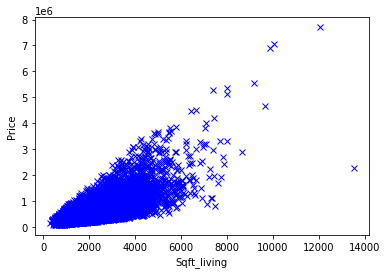

In [5]:

plt.figure()
plt.plot(dataX[:,2] , dataY, 'bx')
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.show()

#Checking the dataset with looking the relationship between sqft_living and price. We expect price generally increase with sqft_living

# Result: We can see the increment. Our data can be used for test.

# Data Preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler # We will use MinMaxScaler 
from numpy.random import permutation

shuffler = permutation(len(dataX))
dataX = dataX[shuffler]
dataY = dataY[shuffler]

# Shuffling the dataset

xTrain = dataX[:len(dataX) * 80 // 100] 
yTrain = dataY[:len(dataY) * 80 // 100]

xTest = dataX[len(dataX) * 80 // 100:]
yTest = dataY[len(dataY) * 80 // 100:]

# IMPORTANT NOTE : Firstly we must separate the datasets into category and then we must scale the data according to the train data

scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
xTrain = scalerX.fit_transform(xTrain)
xTest = scalerX.transform(xTest)
yTrain = scalerY.fit_transform(yTrain.reshape(-1,1)).reshape(-1)
yTest = scalerY.transform(yTest.reshape(-1,1)).reshape(-1)

# We're scaling y data because we have very huge number in y data


# Models: Whole models will have 512 neurons and different amount of layers

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras.callbacks import EarlyStopping

# Importing required modules

gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

# Giving permission to use memory growth option for gpu

In [ ]:
modelParameters = ((256,2),(128,4),(16,32),(8,64))

losses = []

for i in range(4):

    for u in range(5):
        
        model = tf.keras.Sequential()
        model.add(Input(shape = xTrain.shape[1:])) 

        for _ in range(modelParameters[i][1]):

            model.add(Dense(modelParameters[i][0])) # We're using default kernel_initializer and bias_initializer

        model.add(Dense(1)) 

        model.compile(optimizer = 'adam' , loss = 'mse')
            
        callback = EarlyStopping(patience = 100)

        history = model.fit(xTrain,yTrain,
                     epochs = 10000,
                     batch_size = len(xTrain) // 20,
                     validation_data = (xTest,yTest),
                     callbacks = [callback],
                     verbose = 2)
            
        losses.append(history)


In [11]:
minLosses = []

for callback in losses:
    
    minLosses.append(np.min(callback.history['val_loss']))

losses = np.mean(np.array(minLosses).reshape(4,5), axis = 1)

# Why did we test the models many times ?

    We train our models with differents initial kernels and that's mean we start in different location in feature space. We prevent anormal situations with doing this many times. 

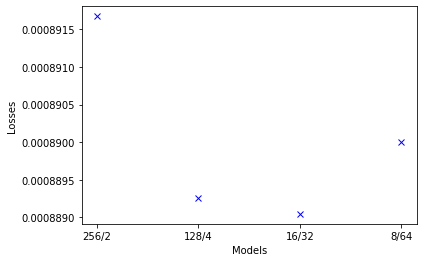

In [12]:
plt.figure()
plt.plot(['256/2','128/4','16/32','8/64'],losses,'bx')
plt.xlabel('Models')
plt.ylabel('Losses')
plt.show()

### Note: We ran same code many times and generally we got the same results. 256/2 model was always the worst model and 16/32 model was always the best model. 128/4 and 8/64 are showed us different results each time. So it made a sense to us , more neuron count for each layer is not important. We became aware that feature count effect the neuron count of each layer. We have 13 feature and we always got bad result for 8/64 (lower neuron count than feature) and we always got the best results in 16/32 model ( neuron count so close to feature count and it have much more layer )

# Result: Layer Count Won